In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My\ Drive/SERIE_A_2015_2020
!ls

/gdrive/.shortcut-targets-by-id/1ZHpp09LVcDbq0kOEosh2HV9Khal3ssDE/SERIE_A_2015_2020
 2018_19_UK_source_serie_a.csv	    season-1516_csv.csv
 2019_20_UK_source_serie_a.csv	    season-1516_csv.gsheet
 About_the_dataset.docx		    season-1617_csv.csv
 Betting			    season-1718_csv.csv
'Exploratory Data Analysis.ipynb'   season-1819_csv.csv


In [ ]:
!pip install chart-studio

In [ ]:
#importing all relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [ ]:
#reading all the seasons files

df_1516 = pd.read_csv('season-1516_csv.csv')
df_1617 = pd.read_csv('season-1617_csv.csv')
df_1718 = pd.read_csv('season-1718_csv.csv')
df_1819 = pd.read_csv('season-1819_csv.csv')

In [ ]:
#removing the betting columns for the purpose of analysis 

df_1516 = df_1516.iloc[:,0:22]
df_1617 = df_1617.iloc[:,0:22]
df_1718 = df_1718.iloc[:,0:22]
df_1819 = df_1819.iloc[:,0:22]

In [ ]:
df_1516.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,I1,22/08/15,Lazio,Bologna,2,1,H,2,1,H,21,9,9,4,18,8,10,3,2,1,0,0
1,I1,22/08/15,Verona,Roma,1,1,D,0,0,D,12,21,7,8,9,11,3,7,2,1,0,0
2,I1,23/08/15,Empoli,Chievo,1,3,A,1,0,H,15,12,5,3,15,19,8,5,1,2,0,0
3,I1,23/08/15,Fiorentina,Milan,2,0,H,1,0,H,13,8,7,0,18,16,4,5,3,2,0,1
4,I1,23/08/15,Frosinone,Torino,1,2,A,1,0,H,13,26,3,7,10,11,3,12,2,2,0,0


In [ ]:
#merging all the different seasons together

df_15_19 = pd.concat([df_1516, df_1617], ignore_index=True)
df_15_19 = pd.concat([df_15_19, df_1718], ignore_index=True)
df_15_19 = pd.concat([df_15_19, df_1819], ignore_index=True)

In [ ]:
df_15_19.shape

(1520, 22)

In [ ]:
df_15_19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,I1,22/08/15,Lazio,Bologna,2,1,H,2.0,1.0,H,21,9,9,4,18,8,10,3,2,1,0,0
1,I1,22/08/15,Verona,Roma,1,1,D,0.0,0.0,D,12,21,7,8,9,11,3,7,2,1,0,0
2,I1,23/08/15,Empoli,Chievo,1,3,A,1.0,0.0,H,15,12,5,3,15,19,8,5,1,2,0,0
3,I1,23/08/15,Fiorentina,Milan,2,0,H,1.0,0.0,H,13,8,7,0,18,16,4,5,3,2,0,1
4,I1,23/08/15,Frosinone,Torino,1,2,A,1.0,0.0,H,13,26,3,7,10,11,3,12,2,2,0,0


In [ ]:
df_15_19.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
HS            int64
AS            int64
HST           int64
AST           int64
HF            int64
AF            int64
HC            int64
AC            int64
HY            int64
AY            int64
HR            int64
AR            int64
dtype: object

In [ ]:
df_15_19['Date'] = pd.to_datetime(df_15_19['Date']) 

In [ ]:
df_15_19['year'] = df_15_19['Date'].dt.year

In [ ]:
df_15_19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,year
0,I1,2015-08-22,Lazio,Bologna,2,1,H,2.0,1.0,H,21,9,9,4,18,8,10,3,2,1,0,0,2015
1,I1,2015-08-22,Verona,Roma,1,1,D,0.0,0.0,D,12,21,7,8,9,11,3,7,2,1,0,0,2015
2,I1,2015-08-23,Empoli,Chievo,1,3,A,1.0,0.0,H,15,12,5,3,15,19,8,5,1,2,0,0,2015
3,I1,2015-08-23,Fiorentina,Milan,2,0,H,1.0,0.0,H,13,8,7,0,18,16,4,5,3,2,0,1,2015
4,I1,2015-08-23,Frosinone,Torino,1,2,A,1.0,0.0,H,13,26,3,7,10,11,3,12,2,2,0,0,2015


## **Exploratory Data Analysis**

In [ ]:
df_15_19.isnull().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        1
HTAG        1
HTR         1
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
year        0
dtype: int64

In [ ]:
df_15_19.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,year
count,1520.000000,1520.000000,1519.000000,1519.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,1.517763,1.204605,0.658328,0.516129,13.493421,11.080263,5.099342,4.119079,13.673026,13.819737,5.769079,4.805921,2.099342,2.397368,0.107895,0.156579,2017.023026
std,1.274018,1.159830,0.830762,0.742709,5.544359,4.750400,2.726024,2.422661,4.285291,4.485997,3.126260,2.713406,1.297184,1.364457,0.332866,0.398098,1.205155
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,10.000000,11.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2016.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,13.000000,14.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2017.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,7.000000,6.000000,16.000000,17.000000,8.000000,7.000000,3.000000,3.000000,0.000000,0.000000,2018.000000
max,7.000000,7.000000,5.000000,4.000000,37.000000,30.000000,18.000000,13.000000,28.000000,32.000000,20.000000,19.000000,6.000000,8.000000,2.000000,2.000000,2019.000000


**List of teams and match count**

In [ ]:
from collections import Counter
htmc_2015 = Counter(df_15_19[df_15_19['year'] == 2015].HomeTeam)
htmc_2016 = Counter(df_15_19[df_15_19['year'] == 2016].HomeTeam)
htmc_2017 = Counter(df_15_19[df_15_19['year'] == 2017].HomeTeam)
htmc_2018 = Counter(df_15_19[df_15_19['year'] == 2018].HomeTeam)
htmc_2019 = Counter(df_15_19[df_15_19['year'] == 2019].HomeTeam)
print('Home Team Match 2015:',htmc_2015)
print('Home Team Match 2016:',htmc_2016)
print('Home Team Match 2017:',htmc_2017)
print('Home Team Match 2018:',htmc_2018)
print('Home Team Match 2019:',htmc_2019)

Home Team Match 2015: Counter({'Lazio': 9, 'Verona': 9, 'Fiorentina': 9, 'Frosinone': 9, 'Inter': 9, 'Palermo': 9, 'Sampdoria': 9, 'Bologna': 9, 'Carpi': 9, 'Torino': 9, 'Empoli': 8, 'Juventus': 8, 'Milan': 8, 'Atalanta': 8, 'Chievo': 8, 'Genoa': 8, 'Napoli': 8, 'Roma': 8, 'Udinese': 8, 'Sassuolo': 7})
Home Team Match 2016: Counter({'Genoa': 20, 'Chievo': 20, 'Empoli': 20, 'Juventus': 20, 'Milan': 20, 'Napoli': 20, 'Sassuolo': 20, 'Udinese': 20, 'Roma': 20, 'Atalanta': 20, 'Lazio': 19, 'Palermo': 19, 'Fiorentina': 19, 'Bologna': 19, 'Inter': 19, 'Sampdoria': 19, 'Torino': 19, 'Carpi': 10, 'Frosinone': 10, 'Verona': 10, 'Pescara': 9, 'Cagliari': 9, 'Crotone': 8})
Home Team Match 2017: Counter({'Crotone': 21, 'Juventus': 20, 'Sassuolo': 20, 'Udinese': 20, 'Inter': 20, 'Atalanta': 20, 'Bologna': 20, 'Roma': 20, 'Napoli': 19, 'Chievo': 19, 'Genoa': 19, 'Milan': 19, 'Cagliari': 19, 'Fiorentina': 19, 'Sampdoria': 19, 'Torino': 19, 'Lazio': 18, 'Empoli': 10, 'Palermo': 10, 'Pescara': 10, 'Ver

**Team winning half-time also winning after full-time**

In [ ]:
df_15_19['win_half_full'] = np.where((df_15_19['FTR'] == df_15_19['HTR']), 'half and full time results same', 'half and full time results different')
df_15_19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,year,win_half_full
0,I1,2015-08-22,Lazio,Bologna,2,1,H,2.0,1.0,H,21,9,9,4,18,8,10,3,2,1,0,0,2015,half and full time results same
1,I1,2015-08-22,Verona,Roma,1,1,D,0.0,0.0,D,12,21,7,8,9,11,3,7,2,1,0,0,2015,half and full time results same
2,I1,2015-08-23,Empoli,Chievo,1,3,A,1.0,0.0,H,15,12,5,3,15,19,8,5,1,2,0,0,2015,half and full time results different
3,I1,2015-08-23,Fiorentina,Milan,2,0,H,1.0,0.0,H,13,8,7,0,18,16,4,5,3,2,0,1,2015,half and full time results same
4,I1,2015-08-23,Frosinone,Torino,1,2,A,1.0,0.0,H,13,26,3,7,10,11,3,12,2,2,0,0,2015,half and full time results different


In [ ]:
# plotting the percentage times the team that won in half time also won during full time
value_counts = df_15_19['win_half_full'].value_counts()
colors = ['gold', 'darkorange']
fig = px.pie(df_15_19, values=value_counts.values, names=value_counts.index)
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title={'text': "% Team won in half-time also won full-time",'x':0.43,'xanchor': 'center','yanchor': 'top'})
fig.show()

**Win % at Home and Away grounds during Half-Time**

In [ ]:
value_counts_halftime = df_15_19['HTR'].value_counts()

In [ ]:
value_counts_halftime = value_counts_halftime.to_frame().reset_index()

In [ ]:
def label_win_team (row):
   if row['index'] == 'H' :
      return 'HOME'
   if row['index'] == 'A' :
      return 'AWAY'
   if row['index'] == 'D' :
      return 'DRAW'

In [ ]:
value_counts_halftime['win_team_halftime'] = value_counts_halftime.apply (lambda row: label_win_team(row), axis=1)

In [ ]:
del value_counts_halftime['index']
value_counts_halftime.set_index('win_team_halftime',inplace = True)
value_counts_halftime.squeeze()

win_team_halftime
DRAW    645
HOME    512
AWAY    362
Name: HTR, dtype: int64

In [ ]:
colors = ['gold', 'darkorange', 'mediumturquoise']

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels = value_counts_halftime.squeeze().index, values=value_counts_halftime.squeeze().values, pull=[0.2, 0, 0])])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title={'text': "Win % at Home and Away grounds during Half-Time",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

**Win % at Home and Away grounds**

In [ ]:
value_counts_win = df_15_19['FTR'].value_counts()

In [ ]:
value_counts_win = value_counts_win.to_frame().reset_index()

In [ ]:
def label_win_team (row):
   if row['index'] == 'H' :
      return 'HOME'
   if row['index'] == 'A' :
      return 'AWAY'
   if row['index'] == 'D' :
      return 'DRAW'

In [ ]:
value_counts_win['win_team_label'] = value_counts_win.apply (lambda row: label_win_team(row), axis=1)

In [ ]:
del value_counts_win['index']
value_counts_win.set_index('win_team_label',inplace = True)
value_counts_win.squeeze()

win_team_label
HOME    689
AWAY    465
DRAW    366
Name: FTR, dtype: int64

In [ ]:
colors = ['gold', 'darkorange', 'mediumturquoise']

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels = value_counts_win.squeeze().index, values=value_counts_win.squeeze().values, pull=[0, 0, 0.2])])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title={'text': "Win % at Home and Away grounds",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

**Wins of teams across all seasons**

In [ ]:
def win_team_label (row):
   if row['FTR'] == 'H' :
      return row['HomeTeam']
   if row['FTR'] == 'A' :
      return row['AwayTeam']

In [ ]:
df_15_19['winning_team_name'] = df_15_19.apply (lambda row: win_team_label(row), axis=1)

In [ ]:
df_15_19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,year,win_half_full,winning_team_name
0,I1,2015-08-22,Lazio,Bologna,2,1,H,2.0,1.0,H,21,9,9,4,18,8,10,3,2,1,0,0,2015,half and full time results same,Lazio
1,I1,2015-08-22,Verona,Roma,1,1,D,0.0,0.0,D,12,21,7,8,9,11,3,7,2,1,0,0,2015,half and full time results same,None
2,I1,2015-08-23,Empoli,Chievo,1,3,A,1.0,0.0,H,15,12,5,3,15,19,8,5,1,2,0,0,2015,half and full time results different,Chievo
3,I1,2015-08-23,Fiorentina,Milan,2,0,H,1.0,0.0,H,13,8,7,0,18,16,4,5,3,2,0,1,2015,half and full time results same,Fiorentina
4,I1,2015-08-23,Frosinone,Torino,1,2,A,1.0,0.0,H,13,26,3,7,10,11,3,12,2,2,0,0,2015,half and full time results different,Torino


In [ ]:
win_team_counts = df_15_19['winning_team_name'].value_counts().sort_values()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y = win_team_counts.index,
    x = win_team_counts.values,
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=1)
    )
))

fig.update_layout(autosize=False,width=1150,height=800,
                  font=dict(family="Times New Roman, monospace",size=16,color="Black"),
     title={
        'text': "Wins of teams across all seasons",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

**Year wise Winner and Runners Up**

In [ ]:
df_win_season = df_15_19.groupby(["year","winning_team_name"])["winning_team_name"].count().reset_index(name = 'win_season')

In [ ]:
df_win_season.sort_values(by = ['year','win_season'],ascending=False,inplace=True)

In [ ]:
df_win_season_top2 = df_win_season.groupby('year').head(2)

In [ ]:
fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Year"),
    yaxis=dict(title_text="No. of wins"),
    barmode="stack",
)

colors = ["#2A66DE", "#FFC32B", "#FFC32B", "#b7410e", "#b7410e", "#FFC32B", "#FFC32B", "#ee4b9d", "#002e53", "#b03060"]

fig.add_trace(
        go.Bar(x=[df_win_season_top2.year, df_win_season_top2.winning_team_name], y=df_win_season_top2.win_season, marker_color=colors),
    )

fig.update_layout(autosize=False,width=1150,height=800,
                  font=dict(family="Times New Roman, monospace",size=16,color="Black"),
     title={
        'text': "Year wise Winner and Runners Up",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig

**Best performing teams in home and away ground**

In [ ]:
df_home_away_win = df_15_19.groupby(['FTR',"winning_team_name"])["winning_team_name"].count().reset_index(name = 'no_of_wins')
df_home_away_win.sort_values(by = ["FTR",'no_of_wins'],ascending=False,inplace=True)
df_home_away_win_top10 = df_home_away_win.groupby(['FTR']).head(10)

In [ ]:
df_home_top10 = df_home_away_win_top10[df_home_away_win_top10['FTR']=='H'].sort_values(by=['no_of_wins'],ascending = False)
df_away_top10 = df_home_away_win_top10[df_home_away_win_top10['FTR']=='A'].sort_values(by=['no_of_wins'],ascending = False)

In [ ]:
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Top 10 Teams with max Away wins","Top 10 Teams with max Home wins"))

fig.add_trace(go.Bar(x = df_away_top10['winning_team_name'], y = df_away_top10['no_of_wins'],
                    marker=dict(color=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar(x=df_home_top10['winning_team_name'], y = df_home_top10['no_of_wins'],
                    marker=dict(color=[2, 3, 5, 7, 9, 10, 11, 13, 15, 17], coloraxis="coloraxis")),
              1, 2)

fig.update_layout(showlegend=False,autosize=False,width=1150,height=500,
                  font=dict(family="Times New Roman, monospace",size=16,color="Black"),
                  title={'text': "Best performing teams in home and away ground",'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.update_xaxes(tickangle=90)
fig.update_yaxes(title_text='No. of Wins')


fig.show()

**Percentage of Win, Loss,Draw of Team on Home and Away grounds**

Text(0.5, 1.0, 'Percentage of Win/Loss/Draw at Away Ground')

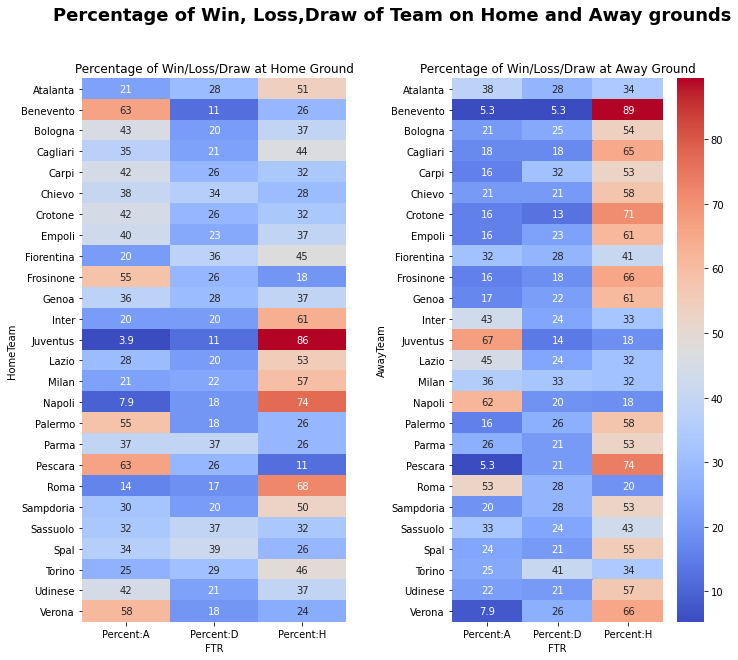

In [ ]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(hspace=0.2,wspace=0.4)
plt.suptitle("Percentage of Win, Loss,Draw of Team on Home and Away grounds",x=0.65,horizontalalignment='center',fontsize=18,fontweight='bold')

                  
plt.subplot(1,3,2)
df_home_team=df_15_19.pivot_table(values='AwayTeam',index='HomeTeam',columns='FTR',aggfunc='count')
Total=df_home_team.sum(axis=1)
for i in df_home_team.columns.tolist():
    df_home_team['Percent:'+i]=100*df_home_team[i]/Total
sns.heatmap(df_home_team[['Percent:A','Percent:D','Percent:H']],cmap='coolwarm',annot=True,cbar=False)
plt.title('Percentage of Win/Loss/Draw at Home Ground')


plt.subplot(1,3,3)
df_away_team=df_15_19.pivot_table(values='HomeTeam',index='AwayTeam',columns='FTR',aggfunc='count')
Total=df_away_team.sum(axis=1)
for i in df_away_team.columns.tolist():
    df_away_team['Percent:'+i]=100*df_away_team[i]/Total
sns.heatmap(df_away_team[['Percent:A','Percent:D','Percent:H']],cmap='coolwarm',annot=True)
plt.title('Percentage of Win/Loss/Draw at Away Ground')

**Goals scored by teams against another on both Home and Away Ground**

In [ ]:
pd.set_option('display.max_columns',500)
df_goal=df_15_19.pivot_table(values=['FTHG','FTAG'],index='HomeTeam',columns='AwayTeam',aggfunc='sum')

Text(0.5, 1.0, 'Score of Teams at Away Ground')

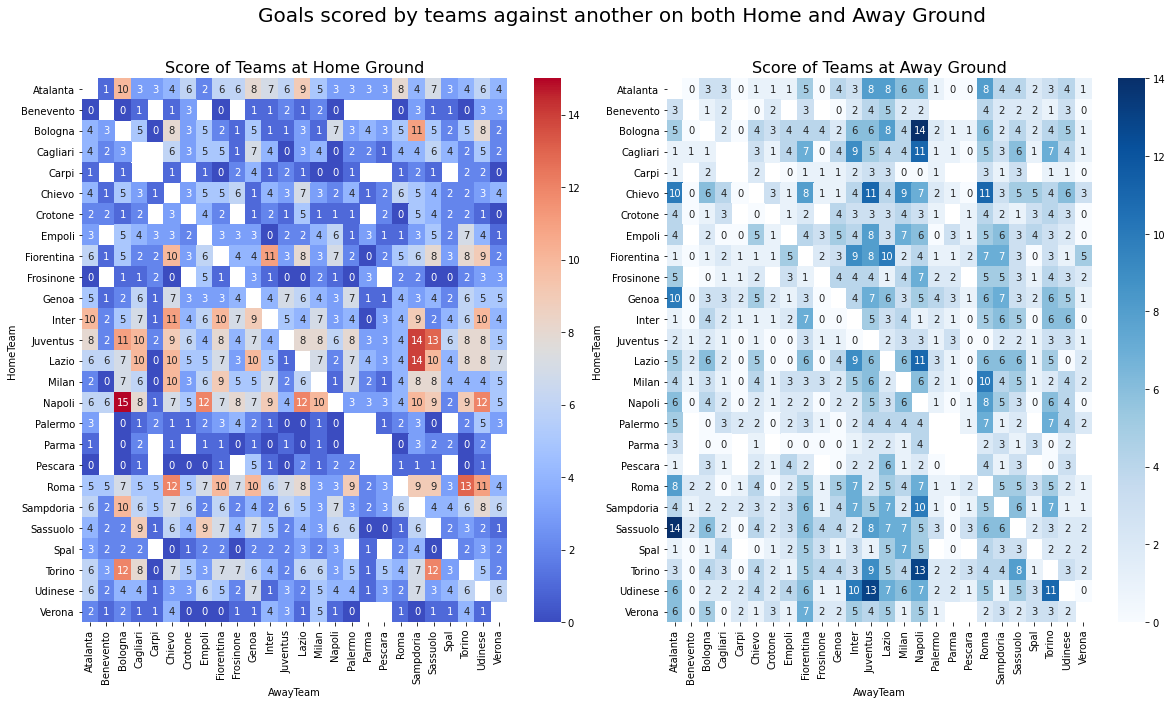

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.1)
plt.suptitle('Goals scored by teams against another on both Home and Away Ground',fontsize=20)
plt.subplot(1,2,1)
sns.heatmap(df_goal.xs('FTHG',level=0,axis=1),cmap='coolwarm',annot=True)
plt.title('Score of Teams at Home Ground', fontsize=16)

plt.subplot(1,2,2)
sns.heatmap(df_goal.xs('FTAG',level=0,axis=1),cmap='Blues',annot=True)
plt.title('Score of Teams at Away Ground',fontsize=16)

**Average yellow and red cards shown in each season to home and away teams**

In [ ]:
df_red_yellow_card = df_15_19.groupby(['year'])['AR','HR','HY','AY'].mean().reset_index()

In [ ]:
fig = go.Figure()

colors = ['rgb(10, 122, 23)', 'rgb(232, 145, 14)', 'rgb(49,130,189)', 'rgb(145, 20, 127)']
mode_size = [8, 8, 12, 8]
line_size = [3, 3, 3, 3]

fig.add_trace(go.Scatter(x=df_red_yellow_card['year'], y=df_red_yellow_card['AR'],
                    mode='lines+markers',name='Away Team Red Cards',marker=dict(color=colors[0], size=mode_size[0])))
fig.add_trace(go.Scatter(x=df_red_yellow_card['year'], y=df_red_yellow_card['HR'],
                    mode='lines+markers',name='Home Team Red Cards',marker=dict(color=colors[1], size=mode_size[1])))
fig.add_trace(go.Scatter(x=df_red_yellow_card['year'], y=df_red_yellow_card['AY'],
                    mode='lines+markers', name='Away Team Yellow Cards',marker=dict(color=colors[2], size=mode_size[2])))
fig.add_trace(go.Scatter(x=df_red_yellow_card['year'], y=df_red_yellow_card['HY'],
                    mode='lines+markers', name='Home Team Yellow Cards',marker=dict(color=colors[3], size=mode_size[3])))



fig.update_layout(showlegend=False,width=1150,height=500,
                  font=dict(family="Times New Roman, monospace",size=16,color="Black"),
                  title={'text': "Average yellow and red cards shown in each season to home and away teams",'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  xaxis=dict(showline=True,showgrid=False,showticklabels=True,linecolor='rgb(204, 204, 204)',linewidth=2,
                              ticks='outside',tickmode = 'linear',
                              tickfont=dict(family='Arial',size=12,color='rgb(82, 82, 82)',)),
                  yaxis=dict(showgrid=False,zeroline=False,showline=False,showticklabels=True,),
                  autosize=False,margin=dict(autoexpand=False,l=100,r=20,t=110,),
                  plot_bgcolor='white',
                  xaxis_title='Year',
                  yaxis_title='Average No. of Cards shown')
fig.show()

**Correlation of win vs foul**

Text(0.5, 1.0, 'Corelation of Win vs Fouls')

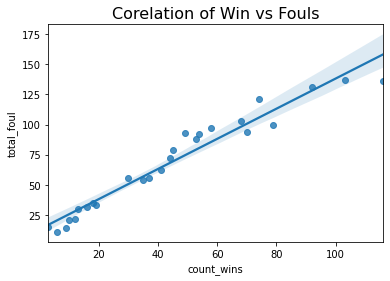

In [ ]:
df_win=df_15_19.groupby('winning_team_name').count()['FTR'].reset_index().rename(columns={'FTR': 'count_wins'})
df_home_foul=df_15_19.groupby('HomeTeam').sum()['HTHG']
df_away_foul=df_15_19.groupby('AwayTeam').sum()['HTAG']
df_total_fouls = pd.concat({'Home_Foul':df_home_foul,'Away_Foul':df_away_foul},axis=1).reset_index().dropna().rename(columns={'index': 'winning_team_name'})
df_total_fouls['total_foul'] = df_total_fouls['Home_Foul'] + df_total_fouls['Away_Foul']
df_goal_foul = pd.merge(df_total_fouls,df_win)

sns.regplot('count_wins','total_foul',df_goal_foul)
plt.title('Corelation of Win vs Fouls',fontsize=16)